# Basic State Estimation Example
---

We do the computation of our basic example here

## Assign the initial conditions

We need to set:
- The number of state variables
- A tolerance for our loop ending condition

In [1]:
%Number of state variables
n=1; 

% tolerance for exiting the iterative estimation
tolerance = 10e-10;

## Creation of the state vector
The state is initialized with zeros, to begin

In [2]:
% creating the state vector
x = zeros((2*n-1),1);

## Creation of the covariance and weighting matrix
In this example, we will assume that our confidence levels in the measuring process for the different variables are not the same, to illustrate the behavior.

In [3]:
% creating the covariance matrix
R = [1 0 ;0 .0001];

% creating the weighting matrix

W=inv(R); 

## Measurement function
We have here a fictional relation between the variables and the measurand.

In [4]:
% Setup the measurement function
z=[1;2];

## Initialization for the loop conditions
We go for a reasonable initial value, so the convergence is possible. We also declare the flags to be used in the main loop.

In [5]:
% initialising the state vector
  x(1,1)=0;

% initialising the residue
  measurement_residuals = zeros((2*n-1),1);
  
  flg = 0;
  ctr = 0;
  

## Main estimation loop

We have set a number of iteration that break the cycle. That guarantees that we do not get stuck in the loop.

The measurement function is build from the state vector, and also the Jacobian. 

Then is just the usual process:
1. Build the gain matrix
2. Calculate the inverse
3. Compute the residuals
4. Compute the derivative of the objective function (we are aiming for optimization)
5. Update the states
6. Check if we are converging and the change between iterations is below the tolerance.

In [6]:
while flg == 0 && ctr < 100
    
    % building the measurement function vector
    h1=x^(2)-4*x+4;
    h2=3*x-1;
    h = [h1;h2];

    % building the measurement Jacobian
    H1=2*x-4 ;
    H2=3;
    H = [H1;H2];

    % building the gain matrix
    G = H'*W*H;

    %Building the inverse gain matrix
    iG=inv(G);

    %computing the measurement residue
    measurement_residuals =  z - h;

    % computing derivative of the objective function
    delta_x = iG*H'*W*measurement_residuals;

    % State estimation update

    x = x + delta_x;

    if max(abs(delta_x)) < tolerance
        flg = 1;
    end
    
    ctr = ctr + 1;
    x_iter(ctr,1)=x;
    delx_iter(ctr,1)=delta_x;
    residue_iter(ctr,1)=measurement_residuals(1);
    residue_iter(ctr,2)=measurement_residuals(2);
    iter_count(ctr,1)=ctr;


    state_estimate = x;

end

## Evolution of the results
Here we can see graphically what was going on in our loop.

### State evolution
This shows how the states evolve to a value in the consecutive iterations.

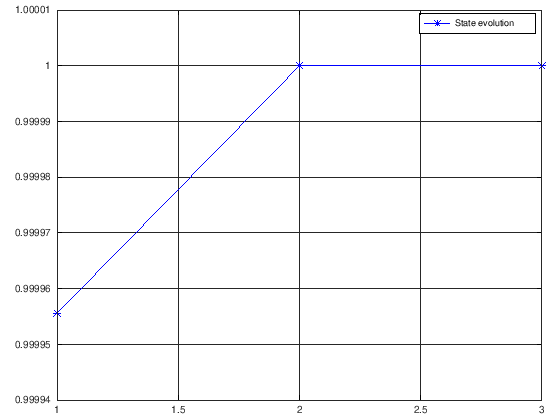

In [7]:
figure(1)
title('State evolution per iteration'); 
plot(iter_count,x_iter,'-*b')
legend ('State evolution');
grid on;


### Evolution of the residuals
The expected behaviour is a convergence to zero.


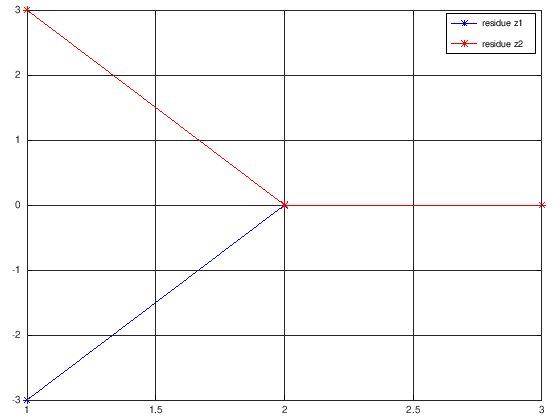

In [8]:
figure(2)
title('Residue evolution per iteration'); 
plot(iter_count,residue_iter(:,1),'-*b')
hold on
plot(iter_count,residue_iter(:,2),'-*r')
legend ('residue z1','residue z2');
grid on;

### Evolution of the $ \Delta x $
In a case of convergence, it also needs to get smaller as fast as possible, as this signals how much we might still need to change to get to the actual value of the states.

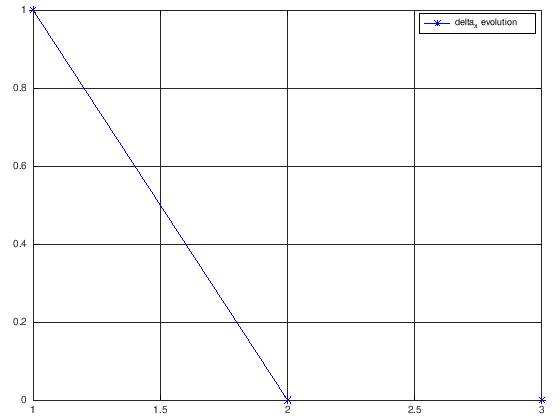

In [9]:
figure(3)
title('delta_x evolution per iteration'); 
plot(iter_count,delx_iter,'-*b')
legend ('delta_x evolution');
grid on;
    